In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
clube_informatica_dev = pd.read_csv('data/clube_informatica_dev.csv')

In [2]:
clube_informatica_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91 entries, 0 to 90
Data columns (total 8 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Sexo biológico                       91 non-null     object
 1   Faixa Etária                         91 non-null     object
 2   Escolaridade                         91 non-null     object
 3   Tenho computador ou notebook         91 non-null     object
 4   Tenho plano de internet em casa      91 non-null     object
 5   Se tem plano, velocidade contratada  88 non-null     object
 6   Tenho celular?                       91 non-null     object
 7   Situação ocupacional                 91 non-null     object
dtypes: object(8)
memory usage: 5.8+ KB


# Faixa Etária

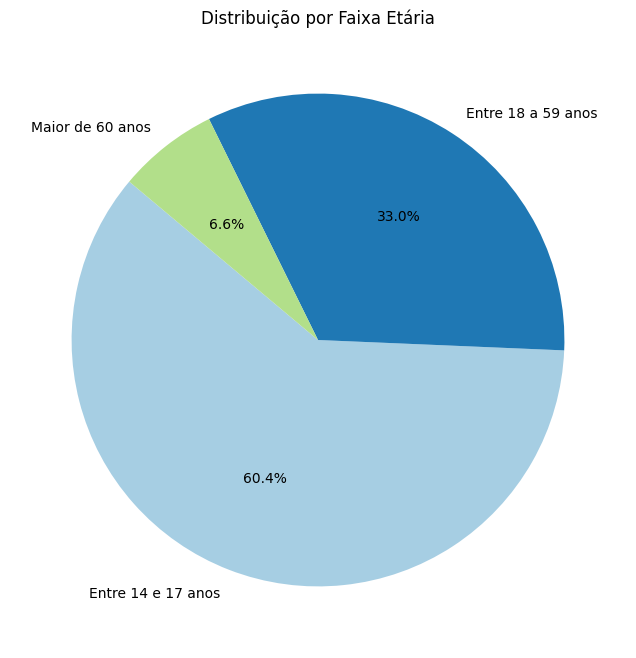

In [7]:
# Contagem das faixas etárias
age_counts = clube_informatica_dev['Faixa Etária'].value_counts()

# Criar o gráfico de pizza
plt.figure(figsize=(8, 8))
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(age_counts))))
plt.title('Distribuição por Faixa Etária')
plt.show()

# Situação Ocupacional por Faixa Etária

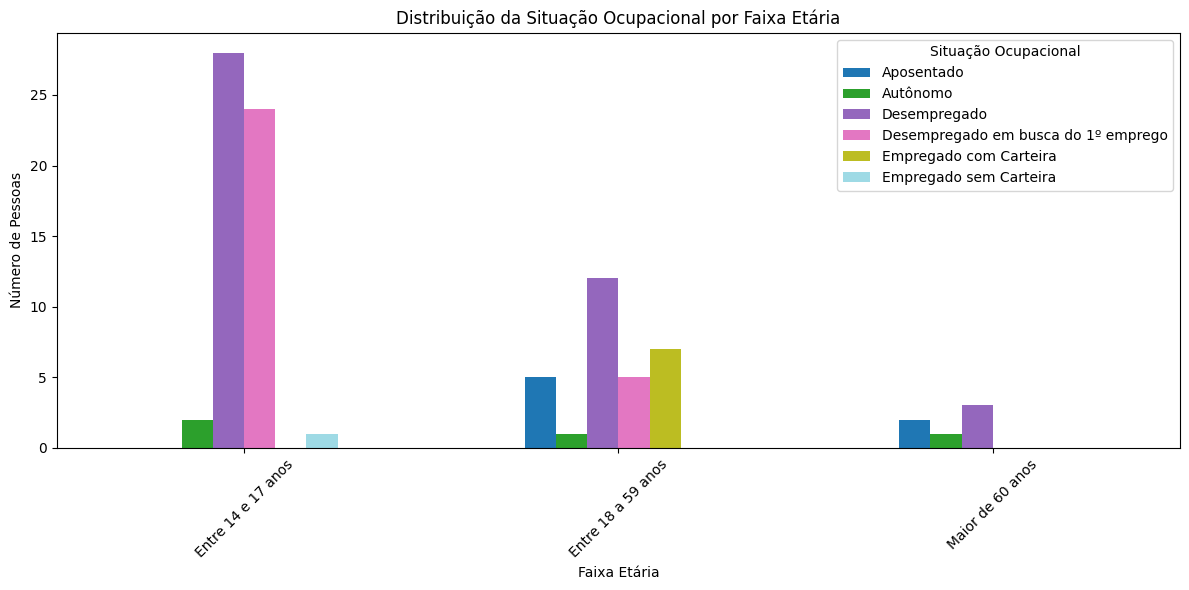

In [8]:
# Contagem da faixa etária por situação ocupacional
age_occupation_counts = pd.crosstab(clube_informatica_dev['Faixa Etária'], clube_informatica_dev['Situação ocupacional'])

# Plotar o gráfico de barras agrupadas
age_occupation_counts.plot(kind='bar', figsize=(12, 6), colormap='tab20')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição da Situação Ocupacional por Faixa Etária')
plt.xticks(rotation=45)
plt.legend(title='Situação Ocupacional')
plt.tight_layout()
plt.show()

# Situação Ocupacional (Adultos e Idosos)

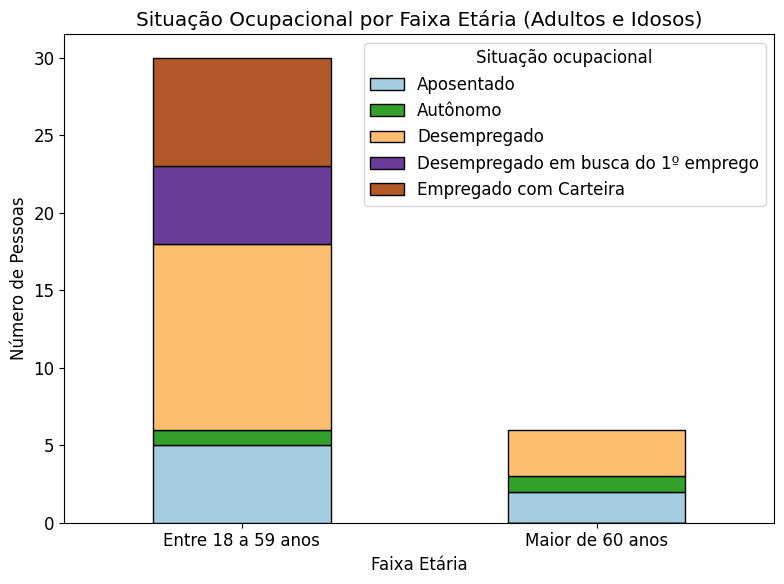

In [25]:
# Definir o tamanho da figura e fonte
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams.update({'font.size': 12})

# Filtrar o DataFrame para incluir apenas adultos e idosos (18 anos ou mais)
filtered_df_adultos = clube_informatica_dev[clube_informatica_dev['Faixa Etária'].isin(['Entre 18 a 59 anos', 'Maior de 60 anos'])]

# Contar situação ocupacional por faixa etária
occupation_by_age_adultos = filtered_df_adultos.groupby(['Faixa Etária', 'Situação ocupacional']).size().unstack().fillna(0)

# Plotar os dados
fig, ax = plt.subplots()
occupation_by_age_adultos.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='black', ax=ax) 
plt.title('Situação Ocupacional por Faixa Etária (Adultos e Idosos)')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')

# Definir o x-ticks para as categorias
ax.set_xticks(range(len(occupation_by_age_adultos.index)))
ax.set_xticklabels(occupation_by_age_adultos.index, rotation=0)

plt.tight_layout()
plt.show()

# Excolaridade (Adultos e Idosos)

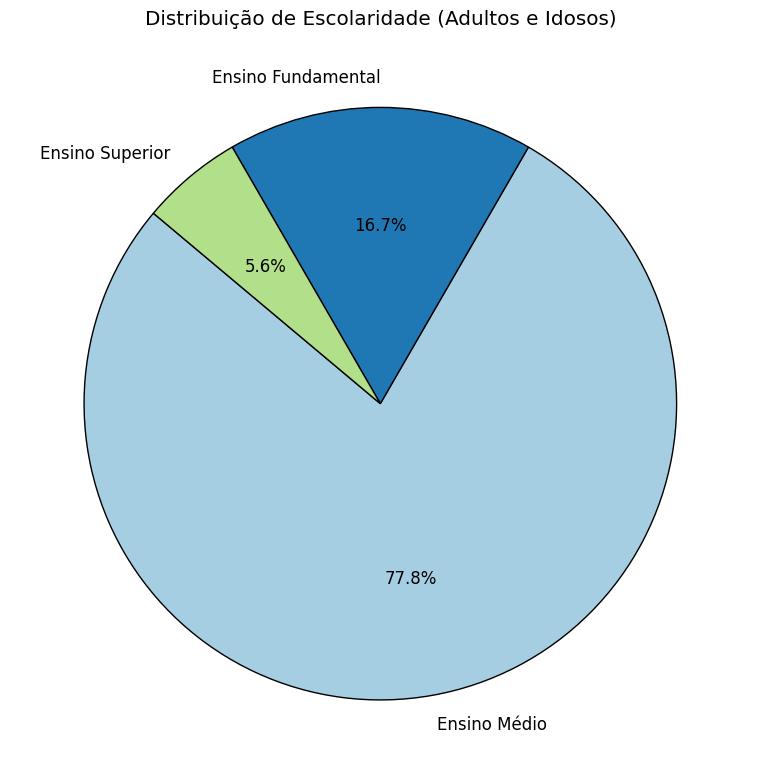

In [26]:
# Filtrar o Dataframe para incluir apenas adultos e idosos
filtered_df = clube_informatica_dev[clube_informatica_dev['Faixa Etária'].isin(['Entre 18 a 59 anos', 'Maior de 60 anos'])]

# Contar a escolaridade para adultos e idosos
education_counts = filtered_df['Escolaridade'].value_counts() 

# Plotar o gráfico de pizza para escolaridade
plt.figure(figsize=(8, 8))
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired.colors, wedgeprops={'edgecolor': 'black'})
plt.title('Distribuição de Escolaridade (Adultos e Idosos)')
plt.tight_layout()
plt.show()

# Faixa Etária por Sexo Biológico

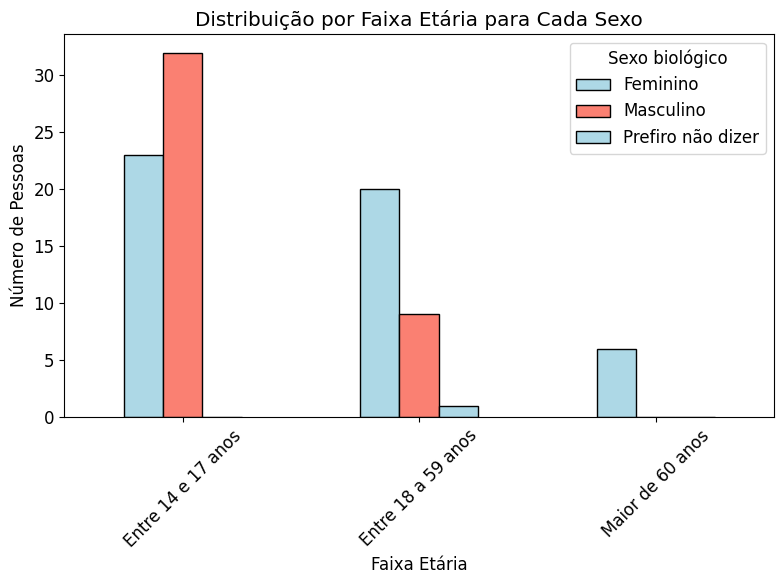

In [29]:
# Contar a quantidade de pessoas por faixa etária para cada sexo
age_gender_counts = clube_informatica_dev.groupby(['Faixa Etária', 'Sexo biológico']).size().unstack()

# Definir o tamanho da figura
plt.rcParams["figure.figsize"] = (8, 6) 

# Criar o gráfico de barras
age_gender_counts.plot(kind='bar', color=['lightblue', 'salmon'], edgecolor='black')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição por Faixa Etária para Cada Sexo')
plt.xticks(rotation=45)
plt.legend(title='Sexo biológico')
plt.tight_layout()
plt.show()

# Situação Ocupacional por Sexo Biológico

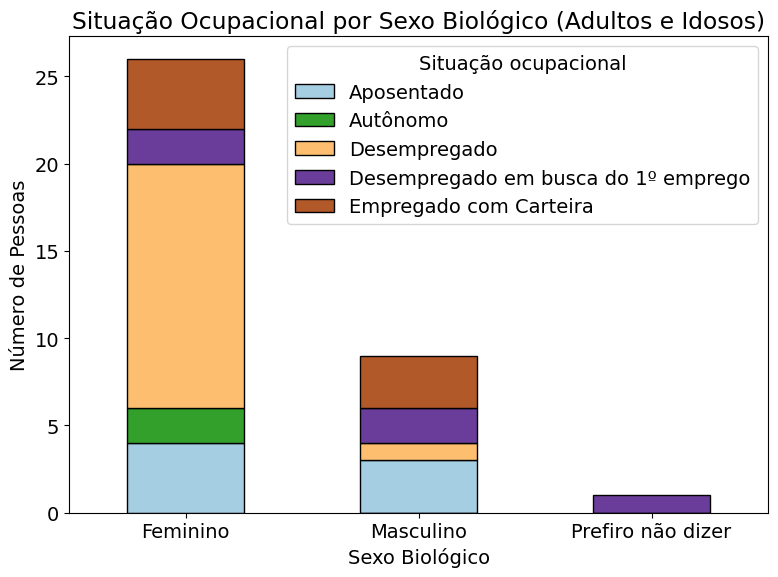

In [30]:
# Definir o tamanho da figura e fonte
plt.rcParams["figure.figsize"] = (8, 6)
plt.rcParams.update({'font.size': 14}) 

# Filtrar o DataFrame para incluir apenas adultos e idosos
filtered_df = clube_informatica_dev[clube_informatica_dev['Faixa Etária'].isin(['Entre 18 a 59 anos', 'Maior de 60 anos'])] 

# Contar a situação ocupacional para cada sexo
occupation_by_gender = filtered_df.groupby(['Sexo biológico', 'Situação ocupacional']).size().unstack().fillna(0)

# Plotar os dados
fig, ax = plt.subplots()
occupation_by_gender.plot(kind='bar', stacked=True, colormap='Paired', edgecolor='black', ax=ax)

plt.title('Situação Ocupacional por Sexo Biológico (Adultos e Idosos)')
plt.xlabel('Sexo Biológico')
plt.ylabel('Número de Pessoas')
ax.set_xticks(range(len(occupation_by_gender.index)))
ax.set_xticklabels(occupation_by_gender.index, rotation=0) 

plt.tight_layout()
plt.show()

# Pessoas que Possuem Computador

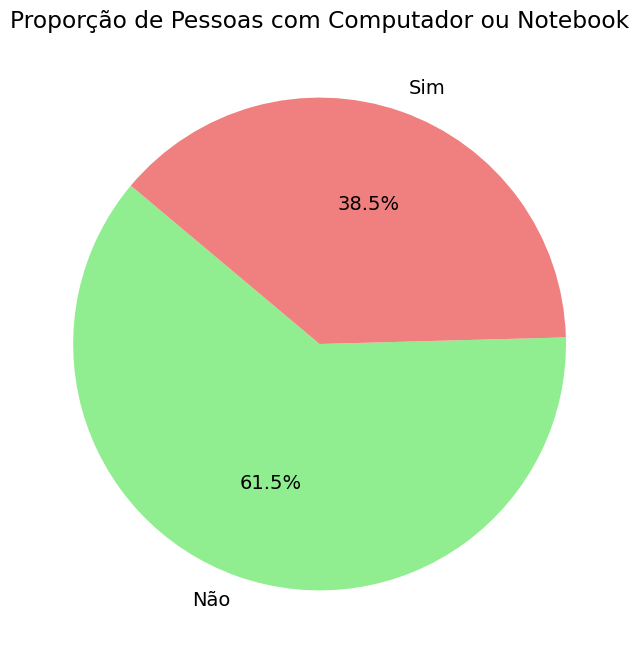

In [20]:
# Contagem dos dados sobre posse de computador
computer_counts = clube_informatica_dev['Tenho computador ou notebook'].value_counts()

# Gráfico de pizza para posse de computador
plt.figure(figsize=(8, 8))
plt.pie(computer_counts, labels=computer_counts.index, autopct='%1.1f%%', startangle=140, colors=['lightgreen', 'lightcoral'])
plt.title('Proporção de Pessoas com Computador ou Notebook')
plt.show()

# Pessoas com Computador por Faixa Etária e Sexo Biológico

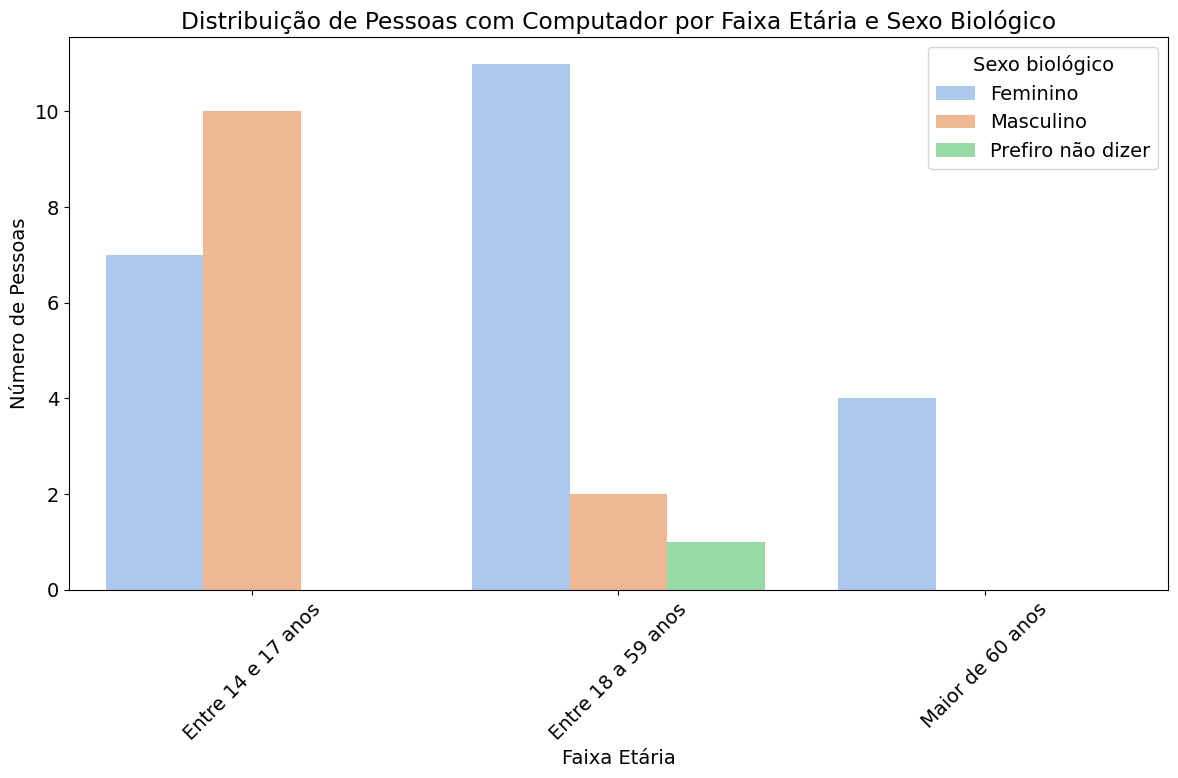

In [21]:
# Filtrar os dados para pessoas que possuem computador
computers_df = clube_informatica_dev[clube_informatica_dev['Tenho computador ou notebook'] == 'Sim']

# Contagem de pessoas com computador por faixa etária e sexo biológico
age_sex_counts = computers_df.groupby(['Faixa Etária', 'Sexo biológico']).size().reset_index(name='Número de Pessoas')

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(12, 8))
sns.barplot(data=age_sex_counts, x='Faixa Etária', y='Número de Pessoas', hue='Sexo biológico', palette='pastel')
plt.xlabel('Faixa Etária')
plt.ylabel('Número de Pessoas')
plt.title('Distribuição de Pessoas com Computador por Faixa Etária e Sexo Biológico')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()